In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Airlines+Data.xlsx")

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df['month']=df['Month'].dt.strftime("%b")  #month extraction
df['year']=df["Month"].dt.strftime("%Y")   #year extraction

In [5]:
df.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [6]:
df=pd.get_dummies(df,columns=['month'])

In [7]:
df.head()


,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

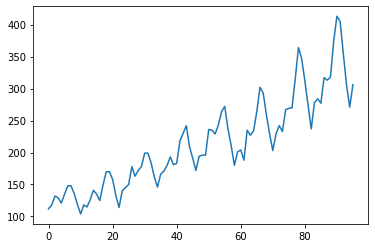

In [8]:
df.Passengers.plot()

In [9]:
df['month']=df['Month'].dt.strftime("%b")

In [10]:
df.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,Jan
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,Feb
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,Mar
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,Apr
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,May


<AxesSubplot:xlabel='month', ylabel='year'>

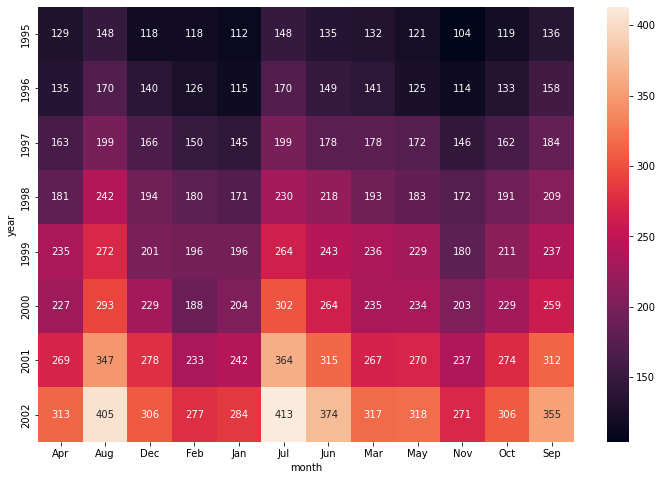

In [11]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Passengers'>

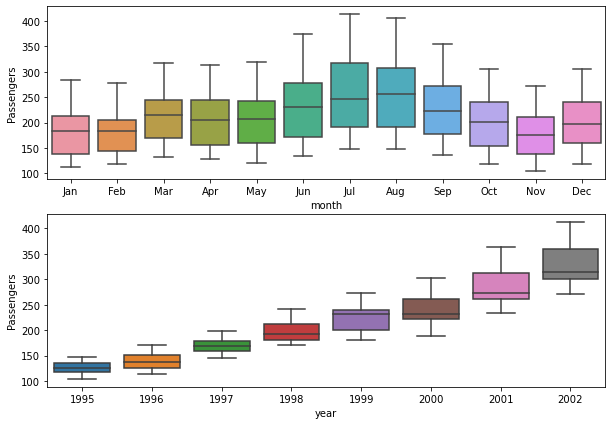

In [12]:
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.boxplot(x='month',y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x='year',y="Passengers",data=df)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

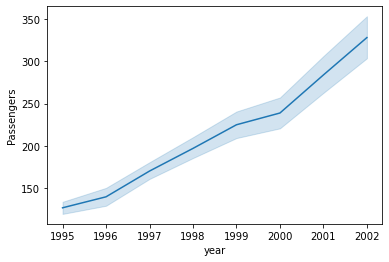

In [13]:
sns.lineplot(x="year",y='Passengers',data=df)

In [14]:
df.shape

(96, 16)

In [15]:
df['t']=pd.Series(np.arange(1,96))

In [16]:
df.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month,t
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,Jan,1.0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,Feb,2.0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,Mar,3.0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,Apr,4.0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,May,5.0


In [17]:
df['t_square']=df['t']*df['t']
df['log_passengers']=np.log(df['Passengers'])

In [18]:
df.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month,t,t_square,log_passengers
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,Jan,1.0,1.0,4.718499
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,Feb,2.0,4.0,4.770685
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,Mar,3.0,9.0,4.882802
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,Apr,4.0,16.0,4.859812
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,May,5.0,25.0,4.795791


In [19]:
Train = df.head(84)
Test = df.tail(12)

In [20]:
Test.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month,t,t_square,log_passengers
84,2002-01-01,284,2002,0,0,0,0,1,0,0,0,0,0,0,0,Jan,85.0,7225.0,5.648974
85,2002-02-01,277,2002,0,0,0,1,0,0,0,0,0,0,0,0,Feb,86.0,7396.0,5.624018
86,2002-03-01,317,2002,0,0,0,0,0,0,0,1,0,0,0,0,Mar,87.0,7569.0,5.758902
87,2002-04-01,313,2002,1,0,0,0,0,0,0,0,0,0,0,0,Apr,88.0,7744.0,5.746203
88,2002-05-01,318,2002,0,0,0,0,0,0,0,0,1,0,0,0,May,89.0,7921.0,5.762051


In [21]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(Test['t']))
rmse_linear = np.sqrt(np.mean((Test['Passengers'])-(pred_linear))**2)
rmse_linear

31.1384084849711

In [22]:
#Exponential

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((Test['Passengers'])-(np.exp(pred_Exp)))**2)
rmse_Exp


10.15607457286655

In [23]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((Test['Passengers'])-(pred_Quad))**2)
rmse_Quad

19.41964615891931

In [24]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
rmse_add_sea = np.sqrt(np.mean((Test['Passengers'])-(pred_add_sea))**2)
rmse_add_sea

130.90476190476184

In [25]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((Test['Passengers'])-(pred_add_sea_quad))**2)
rmse_add_sea_quad

15.71695862624154

In [26]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((Test['Passengers'])-(np.exp(pred_Mult_sea)))**2)
rmse_Mult_sea

138.0064318813239

In [27]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((Test['Passengers'])-(np.exp(pred_Mult_add_sea)))**2)
rmse_Mult_add_sea 

3.673275586260135

In [28]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,3.673276
1,rmse_Exp,10.156075
4,rmse_add_sea_quad,15.716959
2,rmse_Quad,19.419646
0,rmse_linear,31.138408
3,rmse_add_sea,130.904762
5,rmse_Mult_sea,138.006432


### Model rmse_Mult_add_sea has the better rmse value when compared to the other model